In [13]:
import numpy as np
import scipy
import time

In [2]:
from geneticalgorithm2 import geneticalgorithm2 as ga
from geneticalgorithm2 import AlgorithmParams
from OptimizationTestFunctions import Ackley, Rastrigin, plot_3d


def vb_from_ga(vb, dim):
    return np.array([vb]*dim)

# Rastrigin

In [3]:
rastrigin_vb = [-5.12, 5.12]

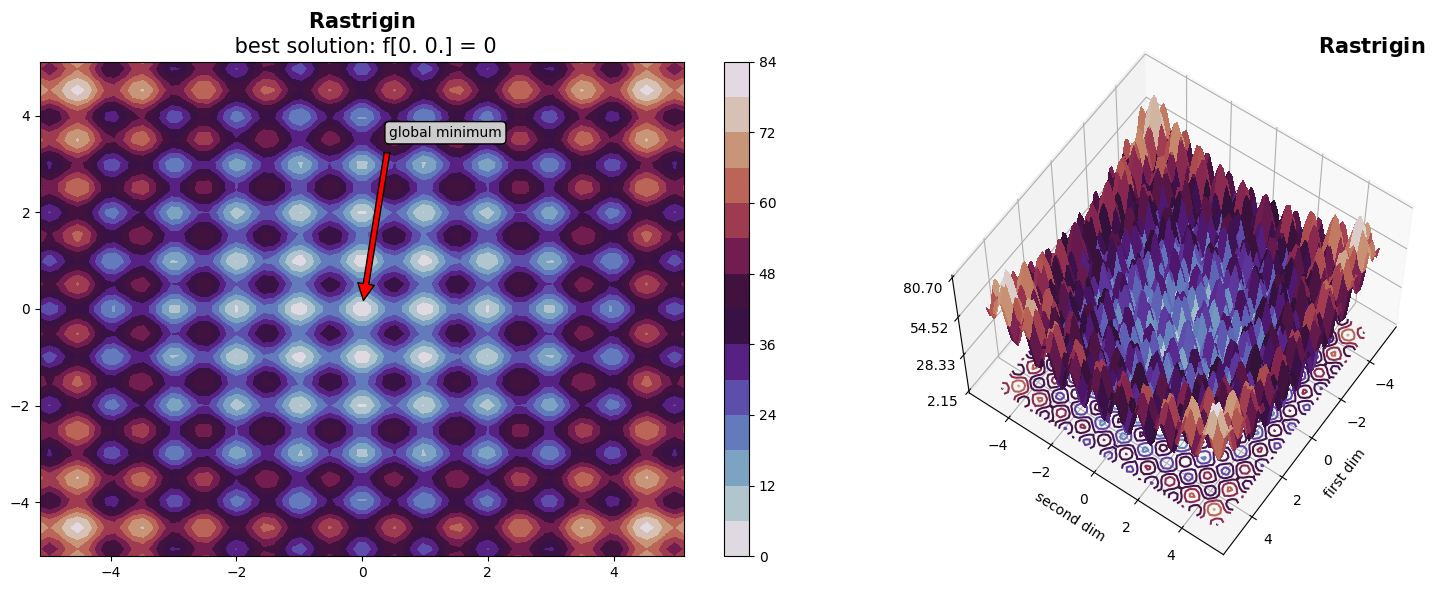

In [4]:
func = Rastrigin(dim=2)
plot_3d(func, 
        points_by_dim = 70, 
        title = fr"{type(func).__name__}",
        bounds = None, 
        show_best_if_exists = True, 
        cmap = 'twilight',
        plot_surface = True,
        plot_heatmap = True)

## Rastrigin GA

### Dimension 2


Average time of function evaluating (secs): 0.00033492326736450195 (total = 0.033492326736450195)

Best score before optimization: 10.065527175102897
                                                                                                                                                                                                        
 The best found solution:
 [1.46347501e-04 9.32180235e-06]

 Objective function:
 4.266319784562711e-06

 Used generations: 100
 Used time: 0.284 seconds


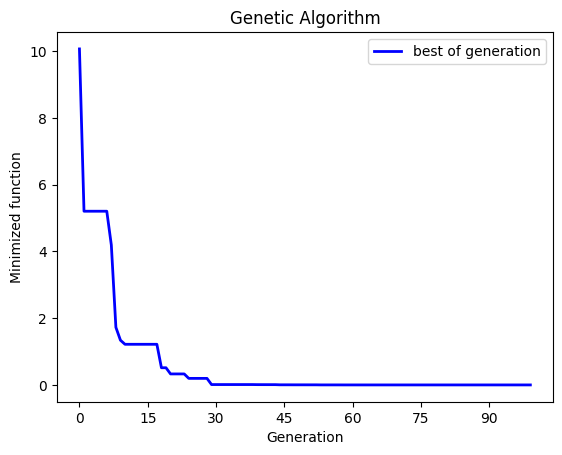

[1.46347501e-04 9.32180235e-06]
4.266319784562711e-06


In [5]:
func = Rastrigin(dim=2)
model_rastrigin = ga(func, 
                     dimension = 2, 
                     variable_type='real', 
                     variable_boundaries = vb_from_ga(rastrigin_vb, 2),
                     function_timeout = 10,
                     algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_rastrigin.run()

print(result.variable) # best solution
print(result.score) # best score

### Dimension 1


Average time of function evaluating (secs): 0.00022990226745605468 (total = 0.02299022674560547)

Best score before optimization: 0.33583709022565955
                                                                                                                                                                                                        
 The best found solution:
 [0.00015994]

 Objective function:
 5.074937424964787e-06

 Used generations: 100
 Used time: 0.24 seconds


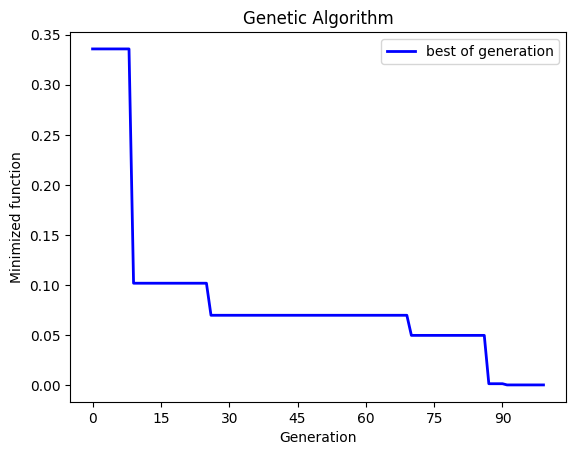

[0.00015994]
5.074937424964787e-06


In [6]:
func = Rastrigin(dim=1)
model_rastrigin = ga(func, 
                     dimension = 1, 
                     variable_type='real', 
                     variable_boundaries = vb_from_ga(rastrigin_vb, 1),
                     function_timeout = 10,
                     algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_rastrigin.run()

print(result.variable) # best solution
print(result.score) # best score

## Rastrigin CG

In [21]:
func = Rastrigin(dim=1)
t = time.time()
result = scipy.optimize.minimize(func, rastrigin_vb, method='cg')
print(f'Time: {time.time() - t}')
result

Time: 0.006876945495605469


     fun: 21.838487584923083
     jac: array([2.38418579e-07, 2.38418579e-07])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 4
    njev: 18
  status: 0
 success: True
       x: array([-3.97978387,  3.97978385])

0.8009295463562012

# Ackley

In [8]:
ackley_vb = [-32.768,32.768]

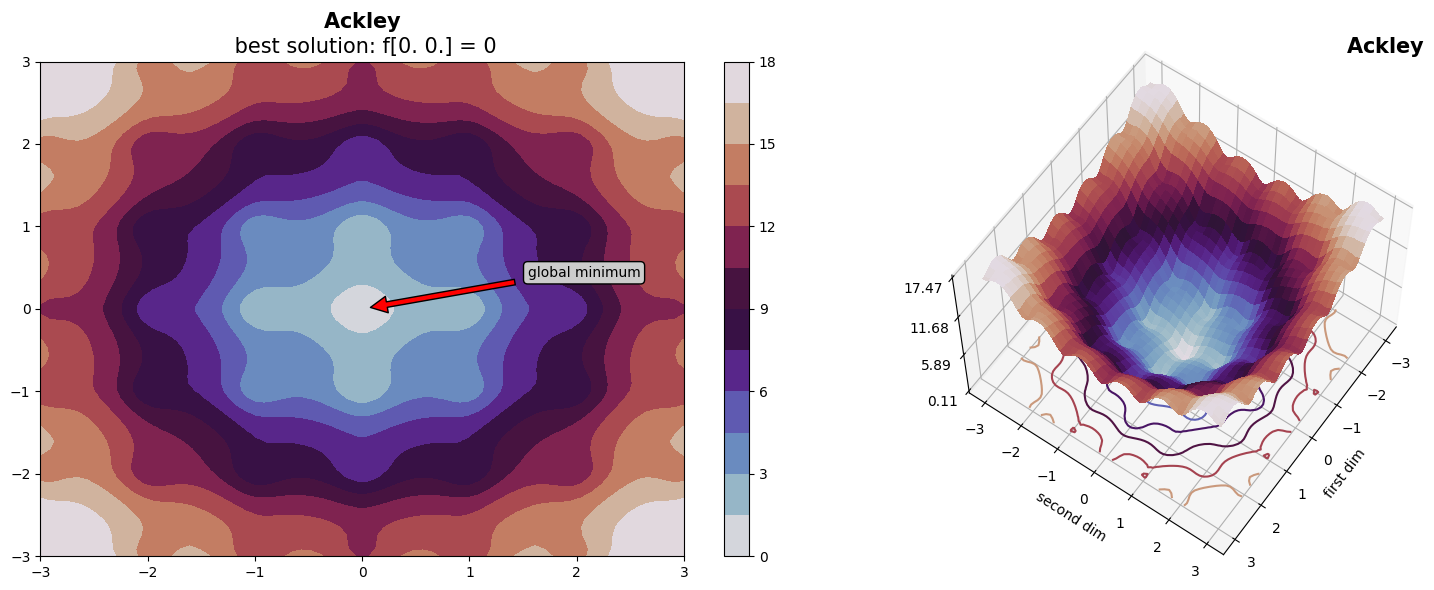

In [9]:
func = Ackley(dim=2)
plot_3d(func, 
        points_by_dim = 70, 
        title = fr"{type(func).__name__}",
        bounds = None, 
        show_best_if_exists = True, 
        cmap = 'twilight',
        plot_surface = True,
        plot_heatmap = True)

## Ackley GA

### Dimension 2


Average time of function evaluating (secs): 0.0002862238883972168 (total = 0.02862238883972168)

Best score before optimization: 12.299525596980892
                                                                                                                                                                                                        
 The best found solution:
 [-0.00097829  0.03955372]

 Objective function:
 0.0445941656334532

 Used generations: 100
 Used time: 0.265 seconds


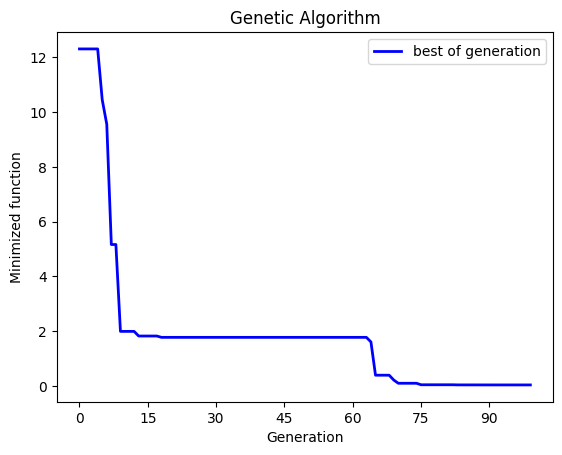

[-0.00097829  0.03955372]
0.0445941656334532


In [10]:
func = Ackley(dim=2)
model_ackley = ga(func, 
                  dimension = 2, 
                  variable_type='real', 
                  variable_boundaries = vb_from_ga(ackley_vb, dim=2),
                  function_timeout = 10,
                  algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_ackley.run()

print(result.variable) # best solution
print(result.score) # best score

### Dimension 1


Average time of function evaluating (secs): 0.00031105518341064455 (total = 0.031105518341064453)

Best score before optimization: 2.7390048015173694
                                                                                                                                                                                                        
 The best found solution:
 [0.00487623]

 Objective function:
 0.001370537728056398

 Used generations: 100
 Used time: 0.293 seconds


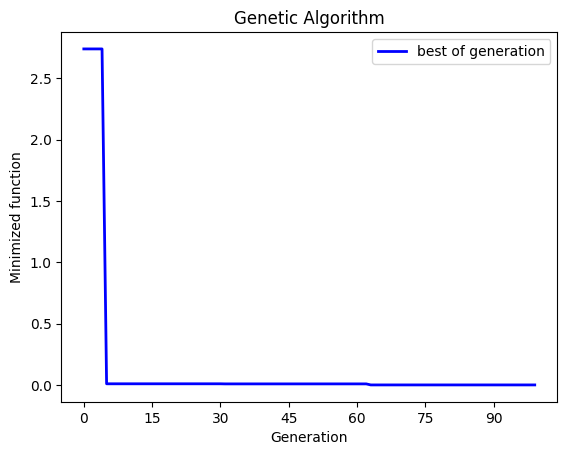

[0.00487623]
0.001370537728056398


In [11]:
func = Ackley(dim=1)
model_ackley = ga(func, 
                  dimension = 1, 
                  variable_type='real', 
                  variable_boundaries = vb_from_ga(ackley_vb, dim=1),
                  function_timeout = 10,
                  algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_ackley.run()

print(result.variable) # best solution
print(result.score) # best score

## Ackley CG

In [12]:
func = Ackley(dim=1)
scipy.optimize.minimize(func, ackley_vb, method='cg')

     fun: 20.000000000000004
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([-33.00000001,  32.99999999])